In [1]:
import pandas as pd
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display
import seaborn as sns

In [34]:
t = df_projection_from_2022_country.loc[df_projection_from_2022_country['Year']==2100].sort_values('Expectancy', ascending=False)
t

,Entity,Code,Year,Expectancy
11849,Monaco,MCO,2100,95.8
7662,Hong Kong,HKG,2100,95.4
10664,Macao,MAC,2100,95.2
8610,Japan,JPN,2100,94.2
10269,Liechtenstein,LIE,2100,94.1
...,...,...,...,...
4028,Cote d'Ivoire,CIV,2100,70.4
3317,Central African Republic,CAF,2100,67.7
13113,Nigeria,NGA,2100,67.3
9795,Lesotho,LSO,2100,66.5


In [2]:
df_projection_from_2022_country = pd.read_csv('full-data/future-life-expectancy-projections.csv')
df_projection_from_1950_country = pd.read_csv('full-data/life-expectancy-at-birth-including-the-un-projections.csv')

In [3]:
df_projection_from_2022_country = df_projection_from_2022_country.rename(columns={'Life expectancy - Sex: all - Age: at birth - Variant: medium': 'Expectancy'})

In [4]:
df_projection_from_1950_country = df_projection_from_1950_country.rename(columns={'Life expectancy - Sex: all - Age: at birth - Variant: estimates': 'Expectancy'})
df_projection_from_1950_country = df_projection_from_1950_country.rename(columns={'Life expectancy - Sex: all - Age: at birth - Variant: medium': 'Projection'})

df_projection_from_1950_country['Expectancy'] = df_projection_from_1950_country['Expectancy'].fillna(df_projection_from_1950_country['Projection'])
df_projection_from_1950_country = df_projection_from_1950_country.drop(columns=['Projection'])

In [5]:
continent_list = ['Asia (UN)', 'Africa (UN)', 'Europe (UN)', 'Oceania (UN)', 'Northern America (UN)', 'Latin America and the Caribbean (UN)', 'World']

In [6]:
df_projection_from_2022_continent = df_projection_from_2022_country[df_projection_from_2022_country['Entity'].isin(continent_list)]

In [7]:
df_projection_from_1950_continent = df_projection_from_1950_country[df_projection_from_1950_country['Entity'].isin(continent_list)]

In [8]:
all_year = sorted(df_projection_from_2022_continent.Year.unique())
all_text = continent_list
all_text.append('All')

In [31]:
def show_world_map_countries():
        print('White color = No data')
        small_df = df_projection_from_2022_country.copy()
        small_df = small_df.sort_values(by=['Year'])
        # Create a choropleth map using Plotly Express
        fig = px.choropleth(small_df, locations='Code', color='Expectancy', hover_name='Entity',
                            color_continuous_scale='turbo', animation_frame='Year', range_color = [0, 100],
                            width=1000, height=800, projection='miller', template='plotly_white',
                            labels={'Life_exp': 'Years'})

        # Set the title and the speed of the chart
        fig.update_layout(title='Dự đoán Life Expectancy trên toàn cầu đến năm 2100')
        fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 20
        fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 10

        # Show the chart
        fig.show() 

White color = No data


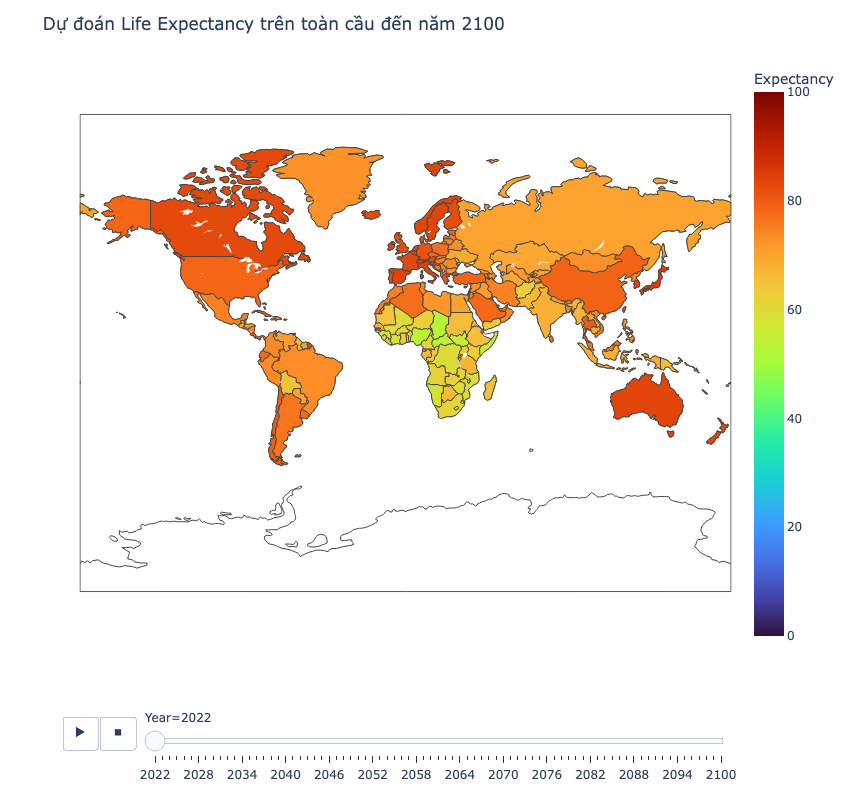

In [32]:
show_world_map_countries()

In [11]:
df_projection_country = df_projection_from_2022_country[~df_projection_from_2022_country['Entity'].isin(continent_list)]
df_projection_country

,Entity,Code,Year,Expectancy
0,Afghanistan,AFG,2022,62.9
1,Afghanistan,AFG,2023,64.2
2,Afghanistan,AFG,2024,65.1
3,Afghanistan,AFG,2025,65.4
4,Afghanistan,AFG,2026,65.6
...,...,...,...,...
20140,Zimbabwe,ZWE,2096,71.1
20141,Zimbabwe,ZWE,2097,71.3
20142,Zimbabwe,ZWE,2098,71.4
20143,Zimbabwe,ZWE,2099,71.5


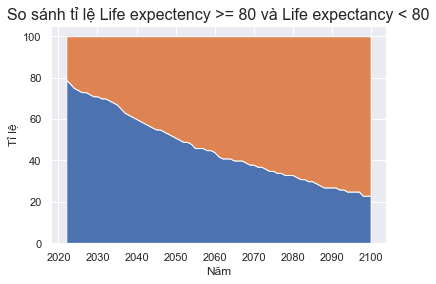

In [12]:
years = []
for year in range(2022, 2101):
    years.append(year)

dict_area = {'period': years}
gt_80 = []
lt_80 = []

for i in range(2022,2101):
    df_projection_country_i = df_projection_country[df_projection_country['Year']==i]
    greater_80 = df_projection_country_i[df_projection_country_i['Expectancy'] >= 80].shape[0]
    lower_80= df_projection_country_i[df_projection_country_i['Expectancy'] < 80].shape[0]
    count = greater_80 + lower_80
    
    gt_80.append(int(greater_80*100/count))
    lt_80.append(100 - int(greater_80*100/count))

dict_area['greate_than_80'] = gt_80
dict_area['lower_than_80'] = lt_80

#set seaborn style
sns.set_theme(rc={'figure.figsize': (12, 8), 'axes.titlesize': 16, 'axes.labelsize': 12})  
plt.title('So sánh tỉ lệ Life expectency >= 80 và Life expectancy < 80')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ')
    
df_area = pd.DataFrame(dict_area)

plt.stackplot(df_area.period, df_area.lower_than_80, df_area.greate_than_80)

In [18]:
def show_line_chart_continents(year, text):
    faded_color = '#EEEEEE'
    small_grouped_df = df_projection_from_2022_continent.groupby('Entity')
    fig = plt.figure(figsize=(12, 5))
    ax1 = plt.subplot(1,1,1)
    x_labels_temp = [2022, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
    x_labels_official = []
    for i in x_labels_temp:
        if i <= year - 20:
            x_labels_official.append(i)
    if year not in x_labels_official:
        x_labels_official.append(year)
    y_labels = [30, 40, 50, 60, 70, 80, 90, 100]
    colors = {'Africa (UN)':'#D1AFE4', 'Northern America (UN)':'#2587F0', 'Latin America and the Caribbean (UN)':'#4037D1', 'Asia (UN)':'#21DA61', 'Europe (UN)':'#E9C213', 'Oceania (UN)':'#F791C1', 'World':'#EB3E12'}
    if text != 'All':
        for i in colors.keys():
            if i != text:
                colors[i] = faded_color
    x_save, y_save = -1, -1
    save_key = None
    for key, df_local in small_grouped_df:
        tmp = df_local.loc[df_local['Year'] <= year, ['Year', 'Expectancy']]
        x = tmp.Year.values
        y = tmp.Expectancy.values
        if text == 'All':
            ax1.plot(x, y, '.-', color=colors[key], label=key)
        else:
            if key == text:
                save_key = key
                x_save = x
                y_save = y
            else:
                ax1.plot(x, y, '.-', color=colors[key])
    if save_key is not None:
        ax1.plot(x_save, y_save, '.-', color=colors[save_key], label=save_key)
    # set up plot
    ax1.set_title("Dự đoán Life Expectancy theo các lục địa, từ năm 2022 đến năm " + str(year))
    ax1.set_xticks(x_labels_official)
    ax1.set_yticks(y_labels)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    y_ticks = ax1.get_yticks()
    for y_tick in y_ticks:
        ax1.axhline(y=y_tick, color='#E7FCFB', linestyle='--', zorder=-1)
    plt.xlabel("Năm")
    plt.ylabel("Dự đoán Life Expectancy")
    plt.legend(loc = "lower right")
    plt.show()

In [19]:
# Create the animation widget
animation1 = ipywidgets.interact(show_line_chart_continents, 
                                 year=ipywidgets.SelectionSlider(description='Year',   options=all_year), 
                                 text=ipywidgets.Combobox(value='All', options=all_text, description='Mode:', ensure_option=True,disabled=False))
# Set the interval time between frames to 100 milliseconds
animation1.interval = 0.01
# Display the animation widget
display(animation1)

interactive(children=(SelectionSlider(description='Year', options=(2022, 2023, 2024, 2025, 2026, 2027, 2028, 2…

<function __main__.show_line_chart_continents(year, text)>

In [15]:
all_year_1950 = sorted(df_projection_from_1950_continent.Year.unique())

In [16]:
def show_line_chart_continents_1950(year, text):
    faded_color = '#EEEEEE'
    small_grouped_df = df_projection_from_1950_continent.groupby('Entity')
    fig = plt.figure(figsize=(12, 5))
    ax1 = plt.subplot(1,1,1)
    x_labels_temp = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2022, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
    x_labels_official = []
    for i in x_labels_temp:
        if i <= year - 20:
            x_labels_official.append(i)
    if year not in x_labels_official:
        x_labels_official.append(year)
    y_labels = [30, 40, 50, 60, 70, 80]
    colors = {'Africa (UN)':'#D1AFE4', 'Northern America (UN)':'#2587F0', 'Latin America and the Caribbean (UN)':'#4037D1', 'Asia (UN)':'#21DA61', 'Europe (UN)':'#E9C213', 'Oceania (UN)':'#F791C1', 'World':'#EB3E12'}
    if text != 'All':
        for i in colors.keys():
            if i != text:
                colors[i] = faded_color
    x_save, y_save = -1, -1
    save_key = None
    for key, df_local in small_grouped_df:
        tmp = df_local.loc[df_local['Year'] <= year, ['Year', 'Expectancy']]
        x = tmp.Year.values
        y = tmp.Expectancy.values
        if text == 'All':
            ax1.plot(x, y, '.-', color=colors[key], label=key)
        else:
            if key == text:
                save_key = key
                x_save = x
                y_save = y
            else:
                ax1.plot(x, y, '.-', color=colors[key])
    if save_key is not None:
        ax1.plot(x_save, y_save, '.-', color=colors[save_key], label=save_key)
    # set up plot
    ax1.set_title("Dự đoán Life Expectancy theo các lục địa, từ năm 1950(?) đến năm " + str(year))
    ax1.set_xticks(x_labels_official)
    ax1.set_yticks(y_labels)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    y_ticks = ax1.get_yticks()
    for y_tick in y_ticks:
        ax1.axhline(y=y_tick, color='#E7FCFB', linestyle='--', zorder=-1)
    plt.xlabel("Năm")
    plt.ylabel("Dự đoán Life Expectancy")
    plt.legend(loc = "lower right")
    plt.show()

In [17]:
# Create the animation widget
animation2 = ipywidgets.interact(show_line_chart_continents_1950, 
                                 year=ipywidgets.SelectionSlider(description='Year',   options=all_year_1950), 
                                 text=ipywidgets.Combobox(value='All', options=all_text, description='Mode:', ensure_option=True,disabled=False))
# Set the interval time between frames to 100 milliseconds
animation2.interval = 0.01
# Display the animation widget
display(animation2)

interactive(children=(SelectionSlider(description='Year', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1…

<function __main__.show_line_chart_continents_1950(year, text)>